In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ds=pd.read_csv("Social_Network_Ads.csv")

X=ds.iloc[:,2:4].values
y=ds.iloc[:,4].values

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(n_estimators=10, criterion='entropy')
cls.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [3]:
y_pred=cls.predict(X_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[54,  4],
       [ 5, 17]], dtype=int64)

In [4]:
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


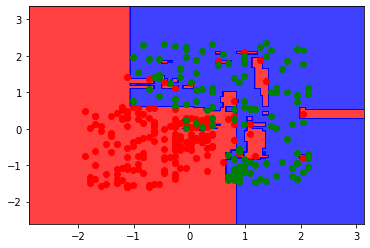

In [5]:
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid ( np.arange ( start=X_set[:,0].min()-1 , stop=X_set[:,0].max()+1 , step=0.01 ),
                      np.arange ( start=X_set[:,1].min()-1 , stop=X_set[:,1].max()+1 , step=0.01 ))

z=np.array([X1.ravel(),X2.ravel()]).T

plt.contourf(X1, X2, cls.predict(z).reshape(X1.shape), alpha=0.75,
                                                         cmap=ListedColormap(
                                                             ('red', 'blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label=j)

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


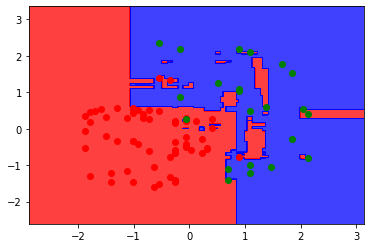

In [6]:
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid ( np.arange ( start=X_set[:,0].min()-1 , stop=X_set[:,0].max()+1 , step=0.01 ),
                      np.arange ( start=X_set[:,1].min()-1 , stop=X_set[:,1].max()+1 , step=0.01 ))

z=np.array([X1.ravel(),X2.ravel()]).T

plt.contourf(X1, X2, cls.predict(z).reshape(X1.shape), alpha=0.75,
                                                         cmap=ListedColormap(
                                                             ('red', 'blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c=ListedColormap(('red','green'))(i),label=j)

plt.show()